In [110]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [111]:
conn = sqlite3.connect('yelpdb.db')

In [112]:
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'",conn)

In [113]:
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [114]:
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [115]:
pd.read_sql_query("select count(*) from business",conn)

,count(*)
0,150346


In [116]:
pd.read_sql_query("""select business_id from business where lower(categories) like '%restaurant%' and is_open=1""",conn )

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,bBDDEgkFA1Otx9Lfe7BZUQ
3,eEOYSgkmpB90uNA7lDOMRA
4,il_Ro8jwPlHresjw9EGmBg
...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg
35000,l9eLGG9ZKpLJzboZq-9LRQ
35001,cM6V90ExQD6KMSU3rRB5ZA
35002,WnT9NIzQgLlILjPT0kEcsQ


In [117]:
business_id = pd.read_sql_query("""select business_id,review_count from business where lower(categories) like '%restaurant%' and is_open=1""",conn )

In [118]:
# What is the descriptive stats for review count and star rating for business?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
 AVG(review_count) AS average_review_count,
 MIN(review_count) AS min_review_count,
 MAX(review_count) AS max_review_count,
 (SELECT review_count from business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_review_count,

 AVG(stars) AS average_start_rating,
 MIN(stars) AS min_star_rating,
 MAX(stars) AS max_star_rating,
 (SELECT stars FROM business ORDER by stars LIMIT 1 OFFSET (SELECT COUNT(*)FROM business)/2) AS median_star_rating

FROM business
WHERE business_id IN {tuple(business_id['business_id'])};

""",conn).transpose()


,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_start_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [119]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1-1.5 * iqr
    upper_bound = q3+1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [120]:
business_id = remove_outliers(business_id,'review_count')

In [121]:
business_id.shape

(31537, 2)

In [122]:
# What is the descriptive stats for review count and star rating for business?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
 AVG(review_count) AS average_review_count,
 MIN(review_count) AS min_review_count,
 MAX(review_count) AS max_review_count,
 (SELECT review_count from business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_review_count,

 AVG(stars) AS average_start_rating,
 MIN(stars) AS min_star_rating,
 MAX(stars) AS max_star_rating,
 (SELECT stars FROM business ORDER by stars LIMIT 1 OFFSET (SELECT COUNT(*)FROM business)/2) AS median_star_rating

FROM business
WHERE business_id IN {tuple(business_id['business_id'])};

""",conn).transpose()


,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_start_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [123]:
# Which restaurants have the highest number of reviews?

pd.read_sql_query(f""" select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by review_count desc
limit 10""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [124]:
# Which restaurants have the highest rating?

pd.read_sql_query(f""" select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by avg_rating desc
limit 10""",conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [125]:
# Do restaurants with higher engagement tend to have higher ratings?

pd.read_sql_query("""select business_id,
  sum(length(date) - length(replace(date,',',''))+1) as checkin_count
  from checkin
  group by business_id
  """,conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [126]:
pd.read_sql_query("""select business_id, count(*) as tip_count
  
  from tip
  group by business_id
  """,conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [127]:
pd.read_sql_query(f""" SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count,
AVG(total.checkin_count) as avg_checkin_count,
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT 
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) +1 ) AS checkin_count,
    SUM(tip.tip_count)as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY 
    b.business_id) as total

GROUP BY total.avg_rating
""",conn)

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


In [128]:
review_count_df = pd.read_sql_query(f""" SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count,
AVG(total.checkin_count) as avg_checkin_count,
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT 
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) +1 ) AS checkin_count,
    SUM(tip.tip_count)as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY 
    b.business_id) as total

GROUP BY total.avg_rating
""",conn)

In [46]:
# plt.figure(figsize = (15,5))
# plt.title('AVG Engagement based on Rating\n\n')
# plt.yticks([])
# plt.xticks([])
# plt.subplot(1,3,1)
# plt.title('Review Count')
# plt.barh(review_count_df['rating'].astype('str'),review_count_df['avg_review_count'],edgecolor = 'k', color = '#CB754B')
# plt.gca().spines['right'].set_visible(False)
# for i, value in enumerate(review_count_df['avg_review_count']):
#     plt.text(value+3, i , str(round(value)),color = 'black', va = 'center')

# plt.xticks([])
# plt.subplot(1,3,2)
# plt.title('Checkin Count')
# plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'],egdecolor = 'k', color = '#F8862C')
# plt.gca().spines['right'].set_visible(False)
# for i,value in enumerate(review_count_df['avg_checkin_count']):
#     plt.text(value+3,i,str(round(value)),color = 'black', va = 'center')

# plt.xticks([])
# plt.subplot(1,3,3)
# plt.title('Tip Count')
# plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'],egdecolor = 'k', color = '#E54F29')
# for i,value in enumerate(review_count_df['avg_tip_count']):
#     plt.text(value+0.05,i,str(round(value)),color = 'black', va = 'center')
# plt.xticks([])
# plt.show()

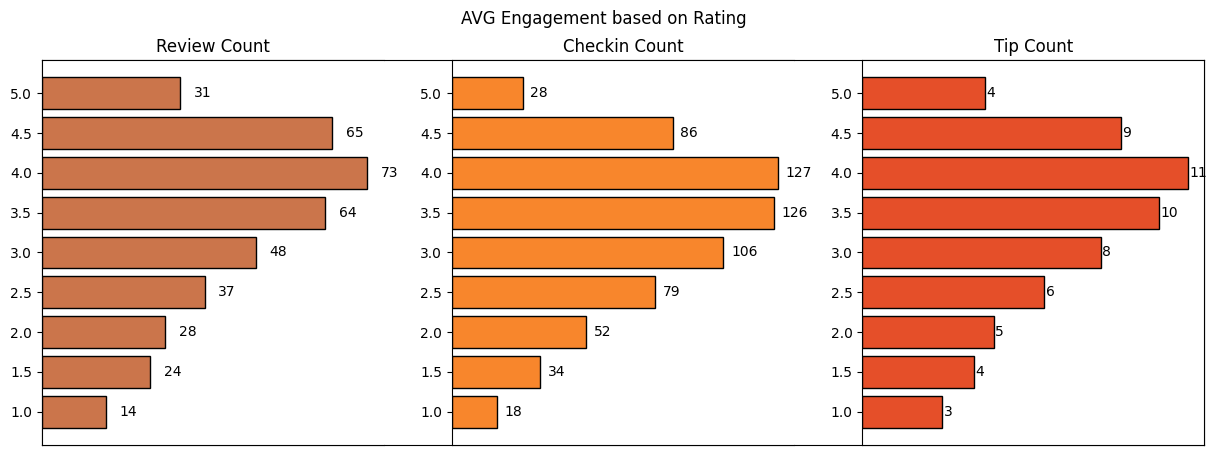

In [129]:
plt.figure(figsize=(15, 5))
plt.suptitle('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])

# Subplot 1: Review Count
plt.subplot(1, 3, 1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor='k', color='#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')
plt.xticks([])

# Subplot 2: Checkin Count
plt.subplot(1, 3, 2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor='k', color='#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')
plt.xticks([])

# Subplot 3: Tip Count
plt.subplot(1, 3, 3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor='k', color='#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value + 0.05, i, str(round(value)), color='black', va='center')
plt.xticks([])

plt.show()


In [130]:
# # Is there a correlation between the number of reviews tips, and checkins for a business?
pd.read_sql_query(f"""SELECT 
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) +1 ) AS checkin_count,
    SUM(tip.tip_count)as tip_count
    
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY 
    b.business_id
""",conn).dropna()

,business_id,review_count,avg_rating,checkin_count,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0
...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0


In [131]:
engagement_df = pd.read_sql_query(f"""
    SELECT 
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count,
        (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END) AS category
    FROM
        business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, COUNT(business_id) AS tip_count 
         FROM tip 
         GROUP BY business_id 
         ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        b.business_id
""", conn).dropna()


In [132]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

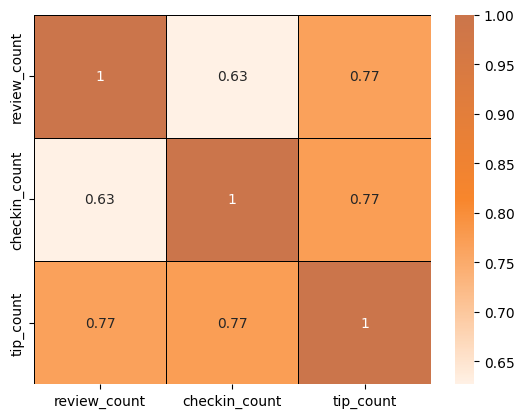

In [133]:
colors = ["#FFF1E5","#F8862C","#CB754B"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap",colors)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(),
            cmap = custom_cmap, 
            annot= True,
            linewidth = 0.5, 
            linecolor = 'black')

In [134]:
# Is there a differnce in the user engagement (reviews, tip, and check-ins) between high-rated and low-rated business?

engagement_df.groupby("category")[["review_count","tip_count","checkin_count"]].mean()



,review_count,tip_count,checkin_count
category,,,
High-Rated,72.291062,10.162766,122.066641
Low-Rated,42.123420,6.541689,88.880828


In [135]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count']+1)
        success_score.append(score)
    return success_score
    

In [136]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?
pd.read_sql_query(f"""select city,state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count)as review_count,
count(*) as restaurant_count
from business
WHERE business_id IN {tuple(business_id['business_id'])}
group by state,city
order by review_count desc
limit 10""",conn)

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561


In [137]:
city_df = pd.read_sql_query(f"""select city,state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count)as review_count,
count(*) as restaurant_count
from business
WHERE business_id IN {tuple(business_id['business_id'])}
group by state,city
order by review_count desc
limit 10""",conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [59]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [138]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(),city_df['longitude'].mean()], zoom_start = 4)

# Define a color size
color_scale = folium.LinearColormap(colors=['green','yellow','#E54F29'],
                                   vmin = city_df['success_score'].min(),
                                   vmax = city_df['success_score'].max())
#Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location = [row['latitude'],row['longitude']],
        radius = 5,
        color = color_scale(row['success_score']),
        fill = True,
        fill_color = color_scale(row['success_score']),
        fill_opacity = 0.7,
        popup = f"Success Score:{row['success_score']}"
    ).add_to(m)
#Add color scale to the map
m.add_child(color_scale)

In [139]:
# Are there any patterns in user engagement over time for succesful business compared to less sucessful ones?
# Are there any seasonal trends in the engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y',date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars),strftime('%m-%Y',tip.date)AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >=3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""",conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y',date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars),strftime('%m-%Y',tip.date)AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""",conn)

In [140]:
high_rated_engagement 

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [141]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [142]:
# time_rating = pd.read_sql_query(f""" SELECT strftime ('%m-%Y',date) AS month_year, AVG(stars) as avg_rating
# FROM review
# WHERE business_id IN {tuple(business_id['business_id'])} 
# GROUP BY month_year
# ORDER BY month_year)
# ;""",conn)

time_rating = pd.read_sql_query(f"""
    SELECT 
        strftime('%m-%Y', date) AS month_year, 
        AVG(stars) AS avg_rating
    FROM review
    WHERE business_id IN {tuple(business_id['business_id'])} 
    GROUP BY month_year
    ORDER BY month_year
;""", conn)


In [143]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [144]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']


In [145]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

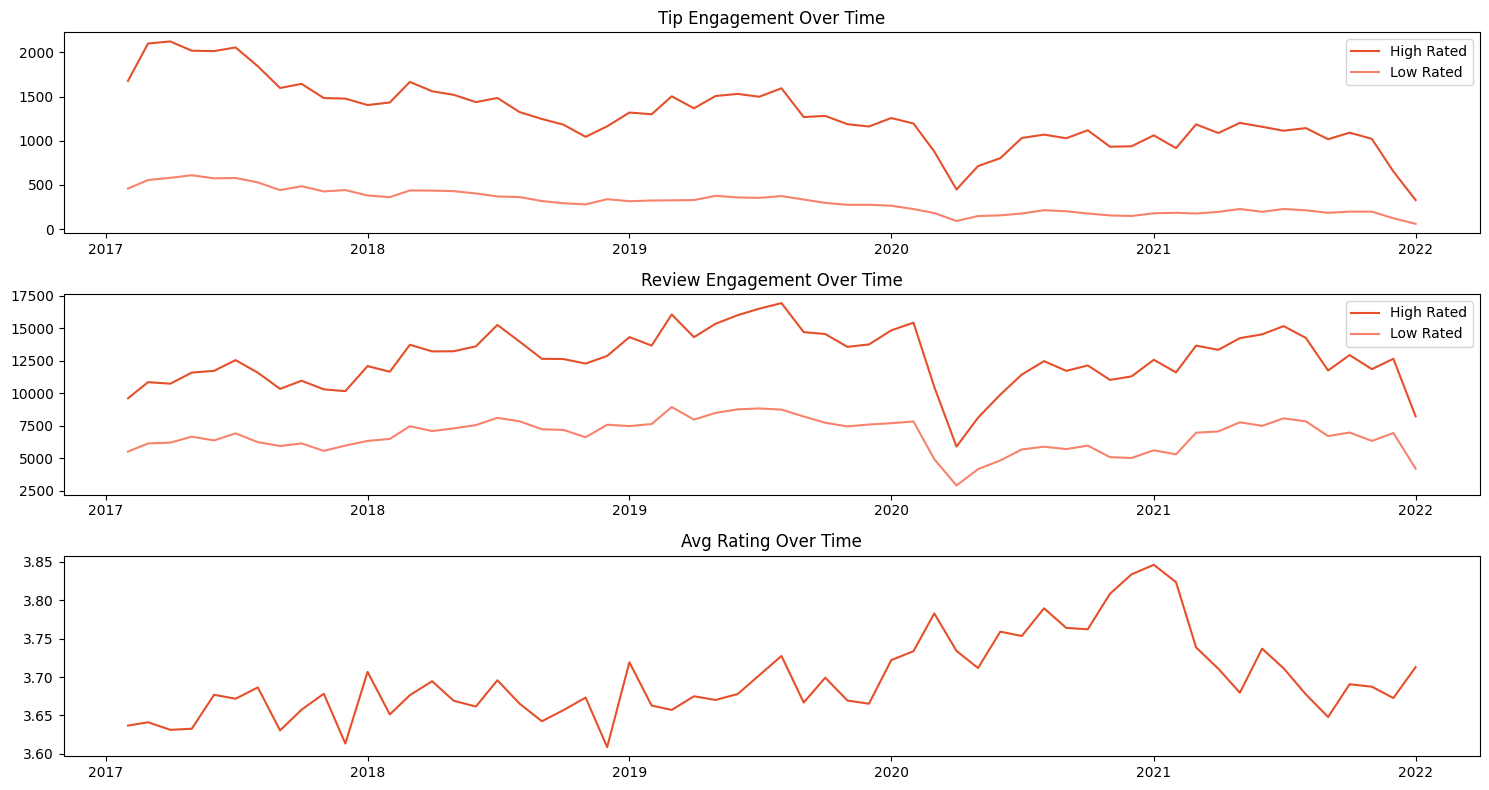

In [146]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'],label = "High Rated", color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['tip_count'],label = "Low Rated", color = '#F8826C')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['review_count'],label = "High Rated", color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['review_count'],label = "Low Rated", color = '#F8826C')
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'],time_rating['avg_rating'],color = '#E54F29')
plt.tight_layout()
plt.show()

In [147]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

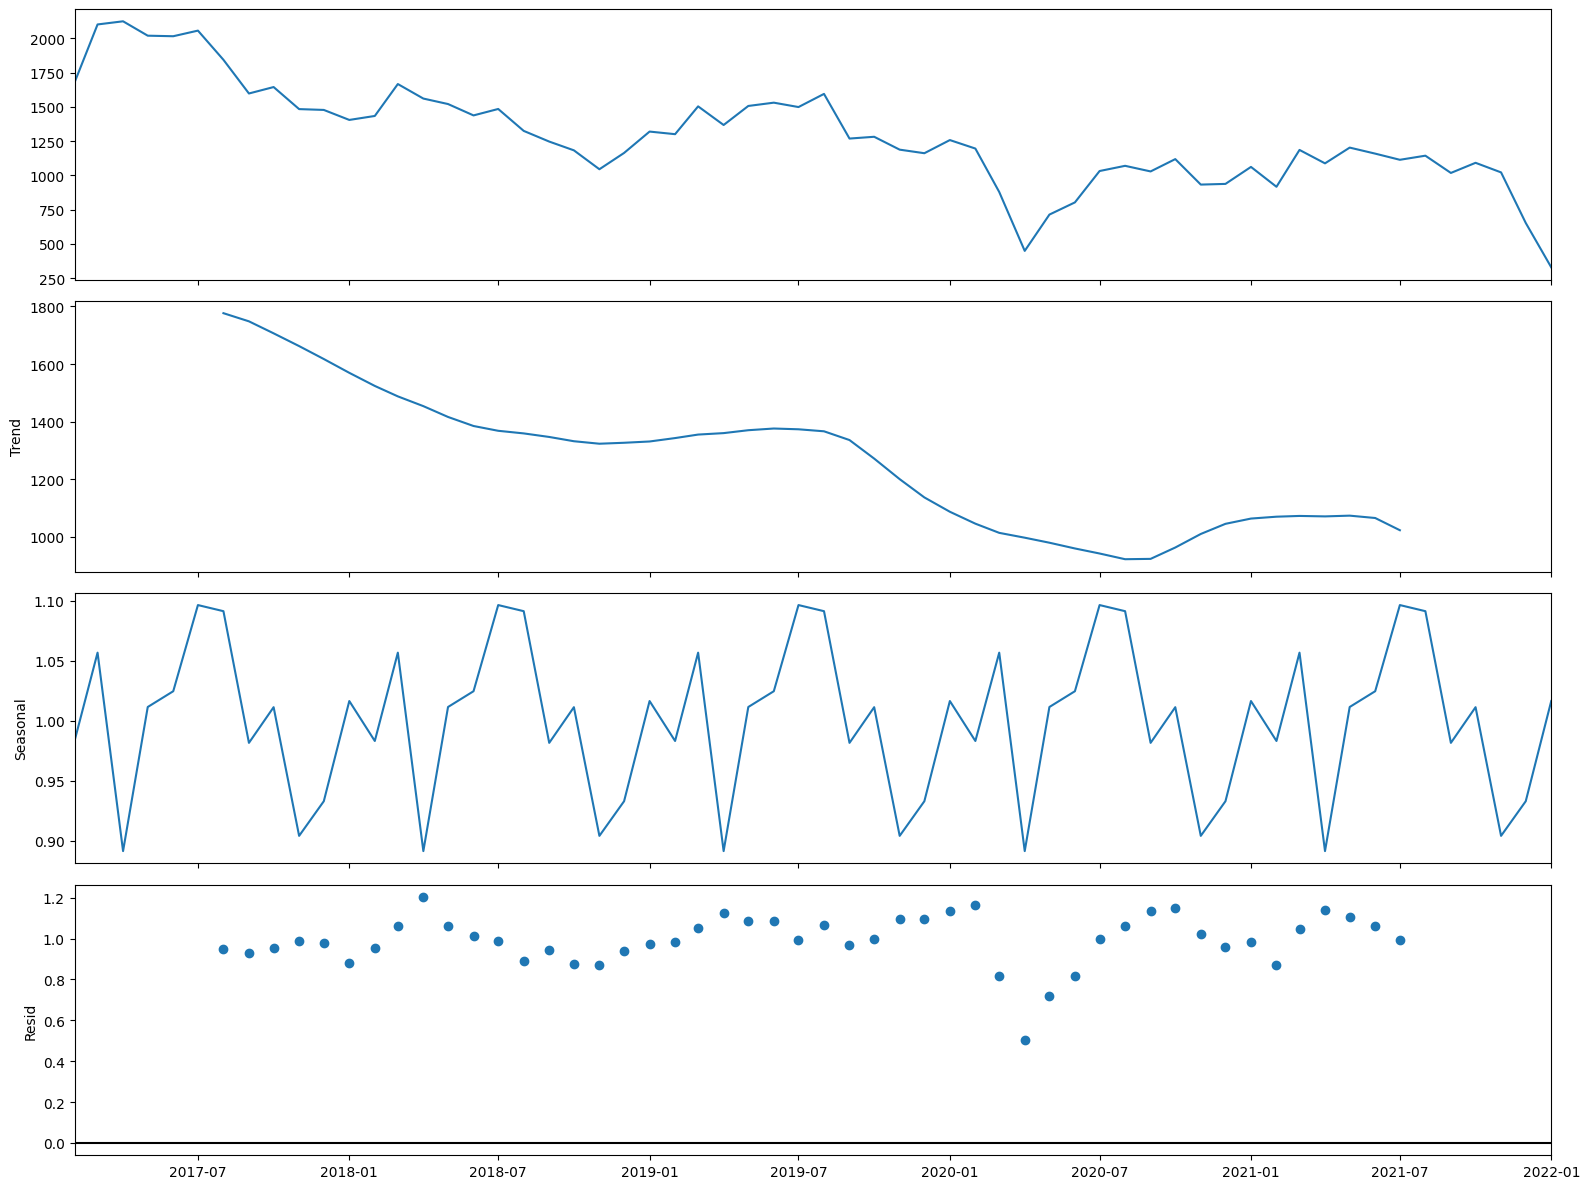

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                 model = 'multiplicative',period = 12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

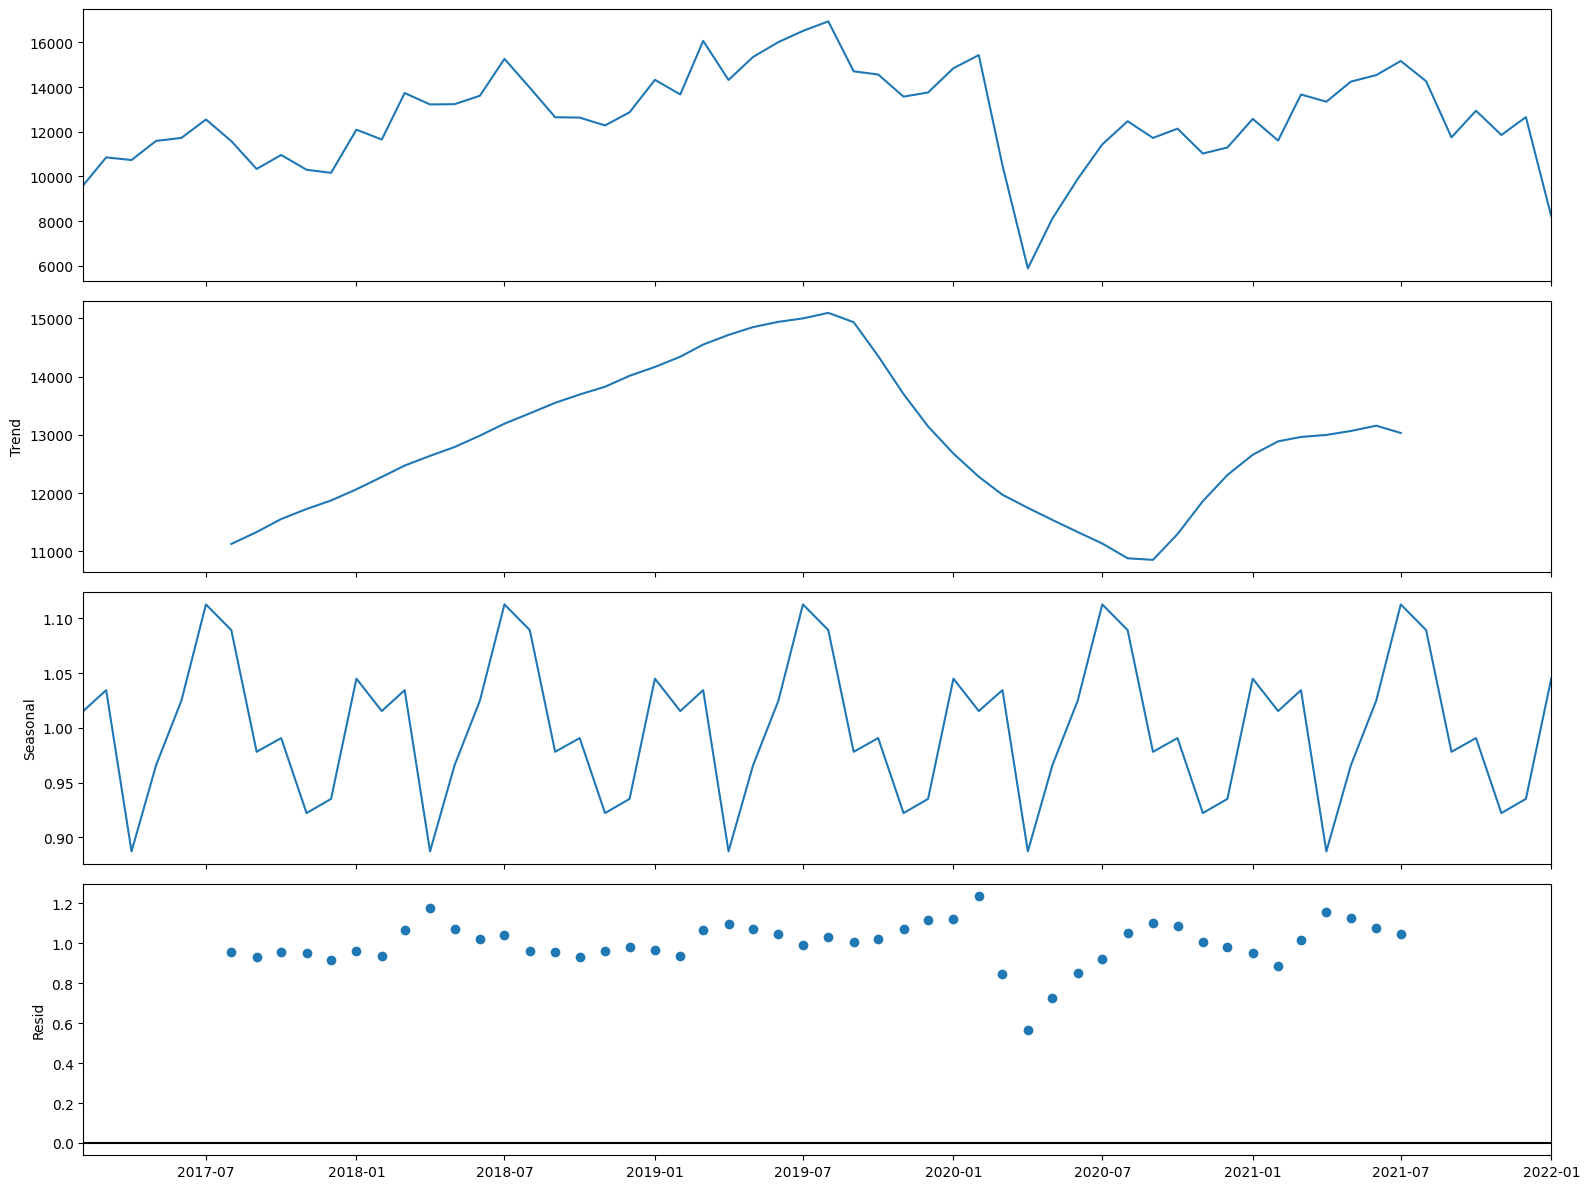

In [163]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                 model = 'mutiplicative',period = 12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

In [151]:
# How does the sentiment of reviews  and tips (useful,funny,cool) correalte with the succes metrics of restarants?

In [152]:
pd.read_sql_query(f""" SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
      SUM(useful) as useful_count,
      SUM(funny) as funny_count,
      SUM(cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""",conn)



,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
31532,nLyyTrxpEOdmNl9P95zXGA,4.0,248,185,50,117
31533,s3ZR7G5l-YN5fqms8vRSRw,4.0,248,107,34,75
31534,vxWjLZMn3uzDQyOjAdwq3w,3.5,248,189,55,110
31535,wPQWqLxY6t3-yRBNPPAmkQ,4.0,248,157,28,93


In [153]:
sentiment_df= pd.read_sql_query(f""" SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
      SUM(useful) as useful_count,
      SUM(funny) as funny_count,
      SUM(cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""",conn)
sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [154]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df) 

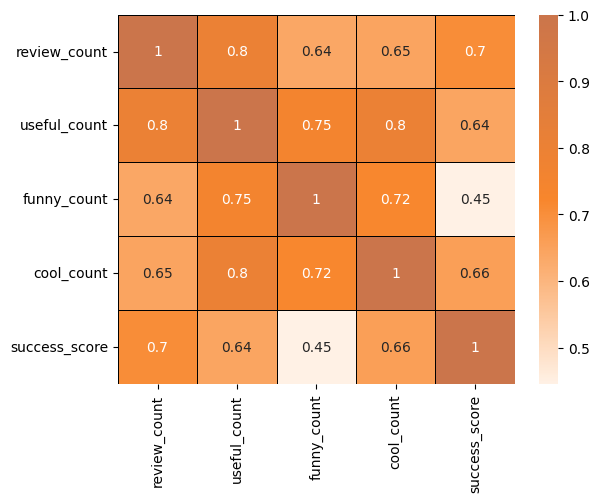

In [155]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),cmap = custom_cmap,annot = True, linewidth = 0.5, linecolor = 'black')
plt.show()

In [156]:
# Is there any differnce in engagement of elite users and non elite users?

# elite_df = pd.read_sql_query(f"""SELECT 
#     elite,
#     COUNT(*) AS row_count,
#     SUM(review_count) AS total_review_count
# FROM
#     (SELECT
#         CASE
#             WHEN elite = '' THEN 'Not Elite')
#             ELSE 'Elite'
#         END AS elite,
#         u.review_count
#     FROM
#         user u) AS user_elite
# GROUP BY
#     elite;
# """,conn)

elite_df = pd.read_sql_query(f"""
    SELECT 
        elite,
        COUNT(*) AS row_count,
        SUM(review_count) AS total_review_count
    FROM
        (SELECT
            CASE
                WHEN elite = '' THEN 'Not Elite'
                ELSE 'Elite'
            END AS elite,
            u.review_count
        FROM
            user u) AS user_elite
    GROUP BY
        elite;
""", conn)


In [157]:
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


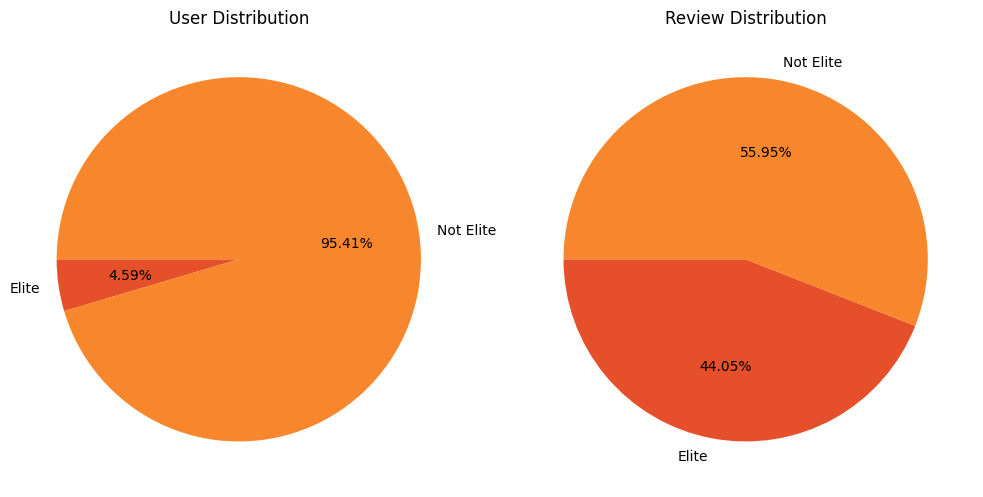

In [158]:
# plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
# plt.title('User Distribution')
# plt.pie(elite_df['num_users'],labels = elite_df['elite'],autopct = '%.2f',startangle = 180, colors = ['#E54F29','#F8862C'])

# plt.subplot(1,2,1)
# plt.title('Review Distribution')
# plt.pie(elite_df['total_review_count'],labels = elite_df['elite'],autopct = '%.2f',startangle = 180, colors = ['#E54F29','#F8862C'])
# plt.show()

plt.figure(figsize=(10,6))

# First subplot for User Distribution
plt.subplot(1, 2, 1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels=elite_df['elite'], autopct='%.2f%%', startangle=180, colors=['#E54F29','#F8862C'])

# Second subplot for Review Distribution
plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct='%.2f%%', startangle=180, colors=['#E54F29','#F8862C'])

# Show the plots
plt.tight_layout()
plt.show()

In [159]:
# What are the busiest hours for restaurants?

review_engagement = pd.read_sql_query("""SELECT
    cast(strftime ('%H',date)as integer)
    as hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
  hour;
""",conn)

tip_engagement = pd.read_sql_query("""SELECT
    cast(strftime ('%H',date)as integer)
    as hour,
    COUNT(*) AS tip_count
FROM
    tip
GROUP BY
  hour;
""",conn)

checkin = pd.read_sql_query(""" SELECT date FROM checkin""",conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

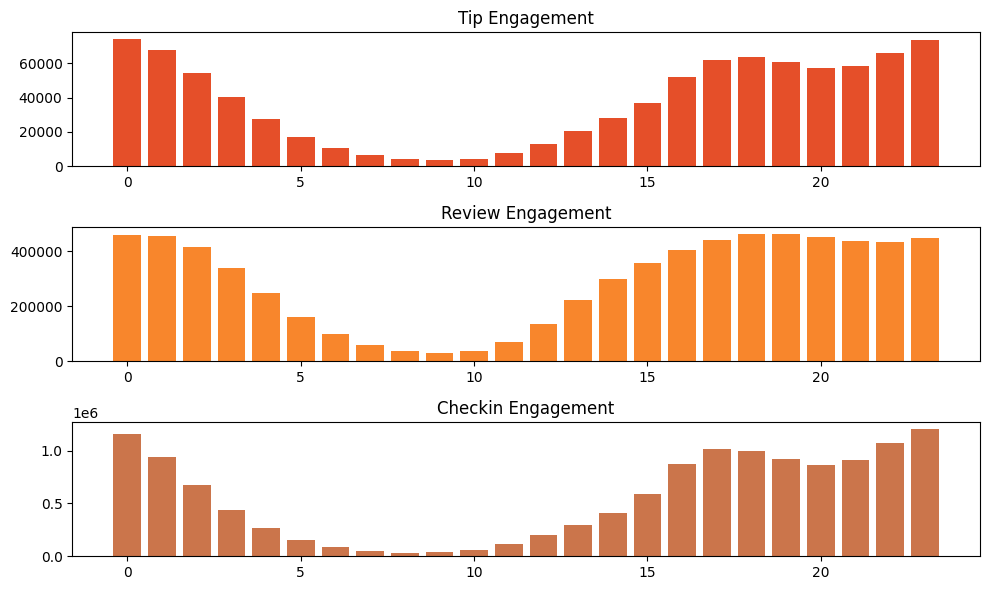

In [160]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'], color = '#E54F29')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'],review_engagement['review_count'], color = '#F8862C')

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index,checkin_engagement[0], color = '#CB754B')
plt.tight_layout()
plt.show()